# Convolutional Neural Network (CNN)
**CNN (Convolutional Neural Network)** is a deep learning model widely used in the fields of computer vision and image processing. CNNs are typically employed for tasks such as image classification and image generation, achieving remarkable success in these domains. In recent years, with the advancement of deep learning and computer hardware, CNNs have made astonishing achievements in image processing. They have excelled in image classification competitions and found extensive applications in areas such as facial recognition, object detection, and autonomous driving. Moreover, the principles of CNNs have inspired research in various other fields.

The goal of this project is to implement a CNN model within a deep learning framework for the task of Yale Face facial recognition. We will use a custom CNN model, adjusting relevant parameters to achieve the highest accuracy in recognizing faces in the test data. By training a CNN model tailored for facial recognition, we aim to accurately identify face labels in input images. Upon completion of training, we will save the trained model parameters to a file. By loading this pre-trained model, we will be able to perform facial recognition on test images, outputting corresponding face labels.

Through this project, we aim to leverage CNN models to accomplish the task of facial recognition. By fine-tuning the model structure and related parameters, we hope to achieve accurate face recognition and generate high-quality images. This will contribute to enhancing the effectiveness of applications in image processing and artificial intelligence, bringing new breakthroughs to related research and applications.

## Load Data

In [1]:
import os
import numpy as np
np.random.seed(50)
from scipy.io import loadmat

DOWNLOAD_DATA = "allFaces.mat"
DOWNLOAD_PATH = "/Users/loyichun/python/Shallow Machine Learning/datasets/"

def load_mat_data(download_path = DOWNLOAD_PATH, download_data = DOWNLOAD_DATA):
    data_path = os.path.join(download_path, download_data)
    data = loadmat(data_path)
    return(data)

allFaces = load_mat_data(DOWNLOAD_PATH, DOWNLOAD_DATA)  
X = allFaces['faces'].T
X.shape


(2410, 32256)

X consists of 2410 images (number of rows), each image having 192x168 pixels (number of columns).

In [2]:
nfaces = np.ndarray.flatten(allFaces['nfaces'])
len(nfaces)


38

There are a total of 38 individuals.

Assign a label to each image indicating which individual it belongs to. This is the target variable.

In [3]:
y = np.zeros(X.shape[0])
start_idx = 0
for i in range(len(nfaces)):
    end_idx = start_idx + nfaces[i]
    y[start_idx:end_idx] = i
    start_idx = end_idx


## Display Images

### First Person
Display all images of the first person:

/var/folders/tb/nqp8bxv94q13d7dn1_2vz1g80000gn/T/ipykernel_21777/1809515122.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(allFaces['m'])
/var/folders/tb/nqp8bxv94q13d7dn1_2vz1g80000gn/T/ipykernel_21777/1809515122.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(allFaces['n'])


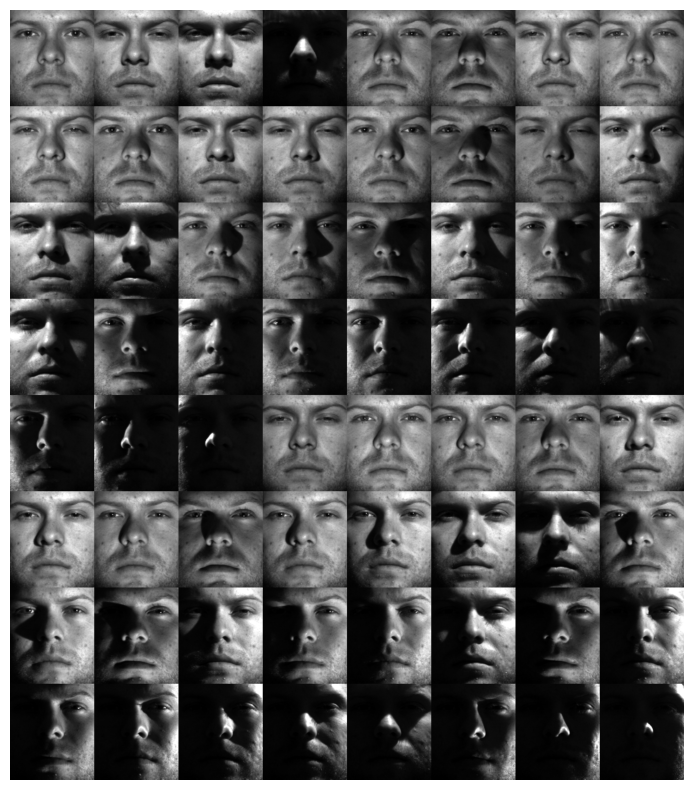

In [4]:
import matplotlib.pyplot as plt

def show_person_faces(person_idx, X, n, m):
    person_idx = person_idx - 1
    subset = X[:,sum(nfaces[:person_idx]):sum(nfaces[:(person_idx + 1)])]
    allFaces = np.zeros((n * 8, m * 8))
    count = 0

    for j in range(8):
        for k in range(8):
            if count < nfaces[person_idx]:
                allFaces[j * n:(j + 1) * n, k * m:(k + 1) * m] = np.reshape(subset[:,count], (m, n)).T
                count += 1
    
    fig, ax = plt.subplots(figsize = (10, 10))
    plt.imshow(allFaces, cmap = 'gray')
    plt.axis('off')
    plt.show()

m = int(allFaces['m'])
n = int(allFaces['n'])
show_person_faces(1, X.T, n, m)


### 15th Person
Display all images of the 15th person:

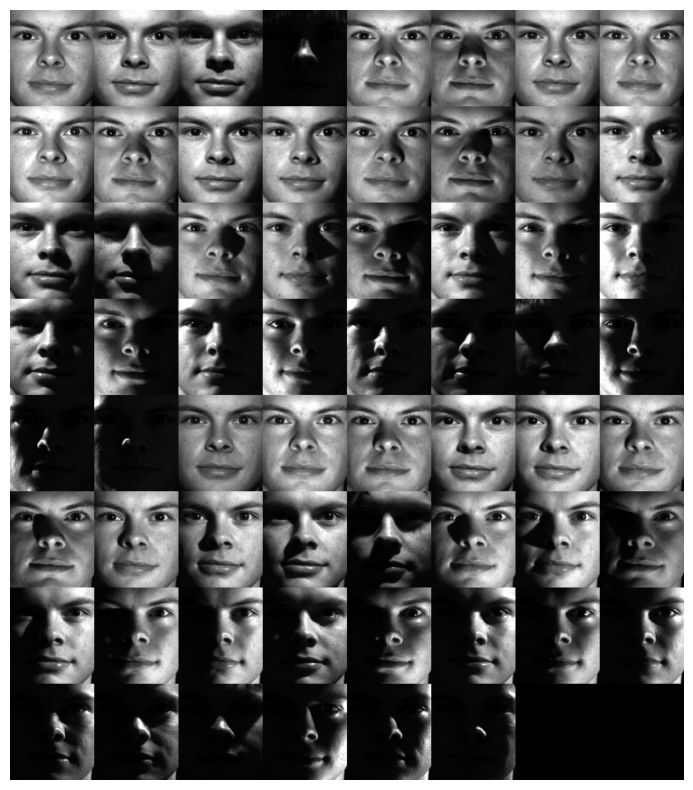

In [5]:
show_person_faces(15, X.T, n, m)


## Data Splitting
Split the data into training and testing sets with a 7:3 ratio.

In [6]:
from sklearn.model_selection import train_test_split
test_size = 0.2  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


## Convolutional Neural Network (CNN)
**Convolutional Neural Network (CNN)** is a neural network architecture widely used in image processing. It demonstrates unique effectiveness when dealing with two-dimensional data, such as images.

The core components of CNN are Convolutional Layers and Pooling Layers. Convolutional Layers apply one or more convolution filters (also known as kernels) to the image, extracting features from different locations. The convolution operation captures local correlations in the image, preserving spatial structure. Pooling Layers are used to reduce the dimensionality of feature maps, retaining essential features and providing a degree of invariance to translation, scaling, and rotation transformations, while also reducing computational complexity.

Following the convolutional and pooling layers, CNNs typically employ Fully Connected Layers for classification or regression. Fully Connected Layers flatten the obtained features and then perform nonlinear transformations and classification through one or more fully connected layers. Additionally, normalization layers may be incorporated as needed.

### Convolutional Layer
Assuming we have a convolutional layer, the input feature map is represented as $\mathbf{X}$, where $\mathbf{X}_{ij}$ denotes the value at a certain position $(i, j)$ on the map. We also have a two-dimensional weight matrix called a convolutional kernel or filter, denoted as $\mathbf{W}$. The convolutional layer computes by applying the convolutional kernel to each position on the feature map.

Specifically, the convolution operation can be calculated by element-wise multiplication of the elements of the convolutional kernel with the corresponding elements at each position on the input feature map, followed by summing all the products. This process is achieved by sliding the kernel over the feature map and performing element-wise multiplication and summation at each position.

To provide a more concrete description of the convolution operation, let's demonstrate:
- Size of the input feature map: $h \times w$ (height $h$, width $w$)

- Size of the convolutional kernel: $k \times k$ (both height and width of the kernel are $k$)

- Stride: $s$ (the step size at which the kernel slides over the feature map)

- Size of the output feature map: $o_h \times o_w$ (height $o_h$, width $o_w$)

In this example, the size of the output feature map can be calculated using the following formulas:

$$o_h = \left\lfloor \frac{h - k}{s} \right\rfloor + 1$$

$$o_w = \left\lfloor \frac{w - k}{s} \right\rfloor + 1$$

where $\lfloor \cdot \rfloor$ denotes the floor function.

Now, we can define the convolution operation $*$ as follows:

$$\mathbf{Y} = \mathbf{X} * \mathbf{W}$$

Here, $\mathbf{Y}$ is the computed convolutional feature map.

For each position $(i, j)$ in the output feature map, we can compute as follows:

$$\mathbf{Y}_{ij} = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} \mathbf{X}_{(i \cdot s + m), (j \cdot s + n)} \cdot \mathbf{W}_{mn}$$

This expression indicates that at each position on the output feature map, we multiply the elements of the corresponding region in the input feature map by the corresponding elements of the convolutional kernel and sum all the products to obtain the value in the output feature map.

Convolutional layers often include a bias term, which can be used to adjust the offset of the convolutional operation. The bias term is represented by a single constant value or a matrix of the same size as the input feature map, denoted as $\mathbf{B}$. During the computation of the convolution operation, the bias term can be added to the result, as shown below:

$$\mathbf{Y} = \mathbf{X} * \mathbf{W} + \mathbf{B}$$

Additionally, in convolutional operations, padding refers to the addition of extra elements (usually zeros) around the input feature map to maintain or adjust the size of the input and output during the convolution process. This is useful for avoiding too small feature map sizes and loss of edge information.

Taking padding into account, we can modify the formula for calculating the size of the output feature map as follows:

$$o_h = \left\lfloor \frac{h - k + 2p}{s} \right\rfloor + 1$$

$$o_w = \left\lfloor \frac{w - k + 2p}{s} \right\rfloor + 1$$

Here, $p$ represents the size of padding. If zero values are padded around the input feature map, then $p$ is the number of padding elements.

Through the convolution operation, we can effectively extract features from images or other two-dimensional data and use them in subsequent layers for processing.

### Pooling Layer
The Pooling Layer is a crucial component of CNNs, used to reduce the dimensionality of the feature map (output of the convolutional layer) while retaining important feature information. It spatially downsamples the feature map, thereby reducing computational and parameter complexity, and enhancing the model's invariance and generalization capabilities.

Common pooling operations include Max Pooling and Average Pooling. Let's explore each of these pooling operations.

#### Max Pooling
Max Pooling is a widely used pooling operation that takes the maximum value from each region as the pooled feature value. Suppose we have a feature map $\mathbf{X}$ with a pooling layer of size $k \times k$ and a stride of $s$. Max Pooling can be expressed as:

$$\mathbf{Y}_{ij} = \max_{m,n} \left( \mathbf{X}_{(i \cdot s + m), (j \cdot s + n)} \right)$$

Here, $\mathbf{Y}_{ij}$ is the value at position $(i, j)$ in the pooled feature map. The formula indicates taking the maximum value in each region of the feature map.

Max Pooling is commonly used to capture the main parts of features while providing translational and local invariance. It reduces the size of the feature map to some extent while retaining essential feature information.

#### Average Pooling
Average Pooling is another common pooling operation and can be expressed as:

$$\mathbf{Y}_{ij} = \frac{1}{k \times k} \sum_{m,n} \left( \mathbf{X}_{(i \cdot s + m), (j \cdot s + n)} \right)$$

Here, $\mathbf{Y}_{ij}$ is the value at position $(i, j)$ in the pooled feature map. The formula indicates taking the average value in each region of the feature map.

Average Pooling is primarily used to reduce the size of the feature map while retaining the overall trend. It can help reduce overfitting in some cases.

Whether using Max Pooling or Average Pooling, the Pooling Layer downsamples the feature map to reduce its size, thereby decreasing computational complexity. Additionally, pooling operations provide a certain degree of translational, scaling, and rotational invariance.

### Fully Connected Layer
The Fully Connected Layer is a crucial component of CNNs, typically used for the final layers of feature extraction and classification. Its purpose is to flatten the previously obtained features and then perform non-linear transformations and classification through one or more fully connected layers.

The name "fully connected" stems from the fact that each neuron in this layer is connected to all neurons in the preceding layer. Suppose we have an input feature vector $\mathbf{X}$ from the preceding layer with a dimension of $d$. The fully connected layer comprises $c$ neurons, where $c$ is the output dimension of the fully connected layer. The operation of the fully connected layer can be expressed as:

$$\mathbf{Y} = \mathbf{W} \cdot \mathbf{X} + \mathbf{b}$$

Here, $\mathbf{W}$ is a weight matrix of size $c \times d$, and $\mathbf{b}$ is a bias vector of dimension $c$. $\mathbf{Y}$ is the output vector of the fully connected layer with a dimension of $c$.

The Fully Connected Layer typically employs linear transformations (matrix multiplication) and non-linear activation functions to introduce non-linearity and expressive power. The most commonly used non-linear activation function is Rectified Linear Unit (ReLU). The main advantage of the ReLU function is its simplicity in computation and, in many cases, superior performance.

In CNNs, convolutional layers and pooling layers are often added before fully connected layers to extract features. The final step involves flattening the output feature map of the last convolutional layer into a vector, followed by one or more fully connected layers for the ultimate classification or regression.

### Normalization Layer
The Normalization Layer is an important part of CNNs used to normalize feature maps for standardization and stabilization purposes. The goal of normalization layers is to enhance the learning capability and stability of the model, speeding up the training process.

Common normalization layers include Batch Normalization and Layer Normalization, each applied in different situations.

1. **Batch Normalization:**
   - Batch Normalization normalizes each feature dimension and standardizes the entire batch of data.

   - The main purpose of Batch Normalization is to re-scale the output feature of each layer to have a mean of 0 and a standard deviation of 1, thereby reducing interdependence between features and stabilizing each layer's input.

   - Batch Normalization is applied to each mini-batch of data.

   - It can be used between convolutional layers and fully connected layers, aiding in faster convergence, improving model adaptability, and reducing sensitivity to initial parameters.

2. **Layer Normalization:**
   - Layer Normalization is similar to Batch Normalization, but it normalizes each sample along the feature dimension.

   - The main purpose of Layer Normalization is to re-scale the feature vectors of each sample to have a mean of 0 and a standard deviation of 1, reducing interdependence between samples and stabilizing each sample's input.

### Channels
Channels refer to the dimensions in a feature map and can be considered as the depth of the feature map, describing how different types of features are represented in the feature map.

In CNNs, the input image enters the network in the form of multiple channels (typically RGB color information). Channels can be seen as feature mappers, where each channel has its own set of weights and biases used to detect and extract different features. The number of channels determines the depth of the convolutional layer and the number of features learned.

## Data Preprocessing
In CNNs, it is common practice to standardize data. Standardization can help improve the convergence speed and stability of the model, as well as mitigate issues such as exploding or vanishing gradients. We will perform standardization on the segmented training and testing data.

### Batch
In machine learning, a batch refers to dividing the dataset into small subsets known as batches. In CNNs, the concept of batches is crucial and widely employed in the training and optimization processes of models.

The concept of batches can be understood in several aspects:

1. **Efficiency Optimization:** When dealing with large datasets in CNNs, inputting the entire dataset into the model at once may lead to memory issues or inefficient computations. By dividing the dataset into multiple batches, the model can be fed with batches sequentially, enhancing efficiency and reducing memory requirements.

2. **Model Updates:** Parameters in CNNs are typically optimized and updated using gradient descent. During the training process for each batch, gradients are calculated based on the data in that batch, and these gradients are then used to update the model's parameters. This batch-wise updating approach helps the model adapt better to the data distribution and improves training effectiveness.

3. **Generalization Capability:** Training with batches allows the model to observe a variety of data samples at each training step, enhancing the model's generalization capability. Since batches are randomly selected from the entire dataset, it ensures that the model sees different data at each training step, reducing the risk of overfitting.

4. **Hardware Acceleration:** Hardware such as GPUs often supports parallel computation. Using batches, multiple data samples can be inputted and computed in parallel, leveraging the parallel capabilities of hardware to accelerate the training process.

In practical applications, the batch size is often adjusted to balance memory requirements and computational efficiency. Larger batch sizes can improve computational efficiency but also require more memory. Smaller batch sizes require less memory but might result in slower training. Here, we choose a batch size of 64.

In [7]:
import torch
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = X_train.reshape(-1, 1, 168, 192)  
X_test = X_test.reshape(-1, 1, 168, 192)  
X_train = np.transpose(X_train,(0, 1, 3, 2))  
X_test = np.transpose(X_test,(0, 1, 3, 2)) 

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size= batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


## Model

The input image size is 1x192x168 (1 channel). The batch size (`batch_size`) is set to 64, and the model architecture is described below:

1. Convolutional Layer `conv1`:
   - Input size: `(batch_size, 1, 168, 192)`

   - Number of filters: 8

   - Filter size: 3x3

   - Output size: `(batch_size, 8, 168, 192)` (unchanged due to padding `padding = 1`)

2. Batch Normalization Layer `batch_norm1`:
   - Input size: `(batch_size, 8, 168, 192)`

   - Output size: `(batch_size, 8, 168, 192)`

3. Max Pooling Layer `max_pool2d`:
   - Input size: `(batch_size, 8, 168, 192)`

   - Pooling kernel size: 2x2

   - Output size: `(batch_size, 8, 84, 96)` (downsampled by half in height and width due to the pooling kernel size)

(Repeat steps 2-3)

4. Fully Connected Layer `fc1`:
   - Input size: `(batch_size, 32 * 12 * 42)`

   - Output size: `(batch_size, 128)`

5. Batch Normalization Layer `batch_norm_fc1`:
   - Input size: `(batch_size, 128)`

   - Output size: `(batch_size, 128)`

6. Fully Connected Layer `fc2`:
   - Input size: `(batch_size, 128)`

   - Output size: `(batch_size, 28)`

7. Batch Normalization Layer `batch_norm_fc2`:
   - Input size: `(batch_size, 28)`

   - Output size: `(batch_size, 28)`

8. Fully Connected Layer `fc3`:
   - Input size: `(batch_size, 28)`
   
   - Output size: `(batch_size, 38)`

Therefore, for an input image size of `(batch_size, 1, 168, 192)`, the model's output size is `(batch_size, 38)`.

This model is constructed with a combination of convolutional layers, batch normalization layers, and fully connected layers. The advantage of this structure is the use of multiple convolutional layers before each pooling layer, gradually extracting and developing more features. Convolutional layers, through the application of different filters, can capture different features of the input data. By stacking multiple convolutional layers and progressively increasing the number of filters (from 8 to 32), the model can learn higher-level and more complex feature representations. Then, before the pooling operation, these features can be further passed to subsequent layers for more precise classification or prediction. Additionally, batch normalization layers are included after each convolutional layer and fully connected layer to enhance the stability and convergence speed of the model.

Since the padding for each convolutional layer is set to 1, the input and output sizes remain consistent in both the horizontal and vertical directions. This is crucial for subsequent convolution and pooling operations, ensuring that the spatial dimensions of the feature maps do not shrink and avoiding the loss of boundary information.

In [8]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
        self.batch_norm1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.batch_norm3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 32, 3, padding=1)
        self.batch_norm4 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32 * 12 * 42, 128)  
        self.batch_norm_fc1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 28)
        self.batch_norm_fc2 = nn.BatchNorm1d(28)
        self.fc3 = nn.Linear(28, 38)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = self.batch_norm3(x)
        x = F.relu(self.conv4(x))
        x = self.batch_norm4(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.batch_norm_fc1(x)
        x = F.relu(self.fc2(x))
        x = self.batch_norm_fc2(x)
        x = self.fc3(x)
        return x

model = CNN()


### Model Training
The model is trained using stochastic gradient descent to optimize the cross-entropy loss function. The learning rate is set to 0.001, and momentum is set to 0.9. Additionally, a training loop with 30 epochs is used, and the training loss is initialized to 0. The training steps are as follows:

1. **Get a Batch:** Obtain a batch of inputs and labels from the training dataset.

2. **Reset Gradients:** Set the gradients of the optimization method to zero to perform a new round of backpropagation.

3. **Forward Pass:** Compute the model's predicted output for the input.

4. **Calculate Loss:** Use the loss function to calculate the loss between the predicted output and the true labels.

5. **Backward Pass:** Perform backpropagation to compute the gradients of the loss with respect to the model parameters.

6. **Update Parameters:** Update the model's parameters to minimize the loss.

7. **Output Training Loss:** Output the average training loss for the current iteration.

This training process follows the steps of forward pass, loss calculation, backward pass, parameter update, and repeats for multiple iterations to gradually reduce the loss and improve the model's accuracy.

Note: Backpropagation is a method used for training neural networks. It involves calculating the gradient of the loss function with respect to each model parameter. The goal of the backpropagation algorithm is to adjust weights and biases based on the error between the input and the expected output, making the output closer to the desired result.

In [9]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataset)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}")


Epoch [1/30], Train Loss: 3.3903
Epoch [2/30], Train Loss: 2.7191
Epoch [3/30], Train Loss: 2.2608
Epoch [4/30], Train Loss: 1.8842
Epoch [5/30], Train Loss: 1.5973
Epoch [6/30], Train Loss: 1.3661
Epoch [7/30], Train Loss: 1.1819
Epoch [8/30], Train Loss: 1.0295
Epoch [9/30], Train Loss: 0.8943
Epoch [10/30], Train Loss: 0.8125
Epoch [11/30], Train Loss: 0.6849
Epoch [12/30], Train Loss: 0.5942
Epoch [13/30], Train Loss: 0.5322
Epoch [14/30], Train Loss: 0.4669
Epoch [15/30], Train Loss: 0.4222
Epoch [16/30], Train Loss: 0.3743
Epoch [17/30], Train Loss: 0.3409
Epoch [18/30], Train Loss: 0.3218
Epoch [19/30], Train Loss: 0.2820
Epoch [20/30], Train Loss: 0.2590
Epoch [21/30], Train Loss: 0.2614
Epoch [22/30], Train Loss: 0.2229
Epoch [23/30], Train Loss: 0.2036
Epoch [24/30], Train Loss: 0.1943
Epoch [25/30], Train Loss: 0.1844
Epoch [26/30], Train Loss: 0.1723
Epoch [27/30], Train Loss: 0.1608
Epoch [28/30], Train Loss: 0.1471
Epoch [29/30], Train Loss: 0.1670
Epoch [30/30], Train Lo

As the training progresses, the training loss gradually decreases.

### Model Testing
Evaluate the performance of the trained model on the test dataset.

In [10]:
model.eval()  
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    model.eval()  
    test_loss = 0.0
    correct = 0

    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

    test_loss /= len(test_dataset)
    accuracy = correct / len(test_dataset) * 100

    print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")


Test Loss: 0.3166, Accuracy: 99.38%


The model has an average loss of 0.3166 and an accuracy of 99.38%. This indicates that the model's predictions on the test data are highly accurate.

#### Display Test Results
Select a batch of test data and display the test results.

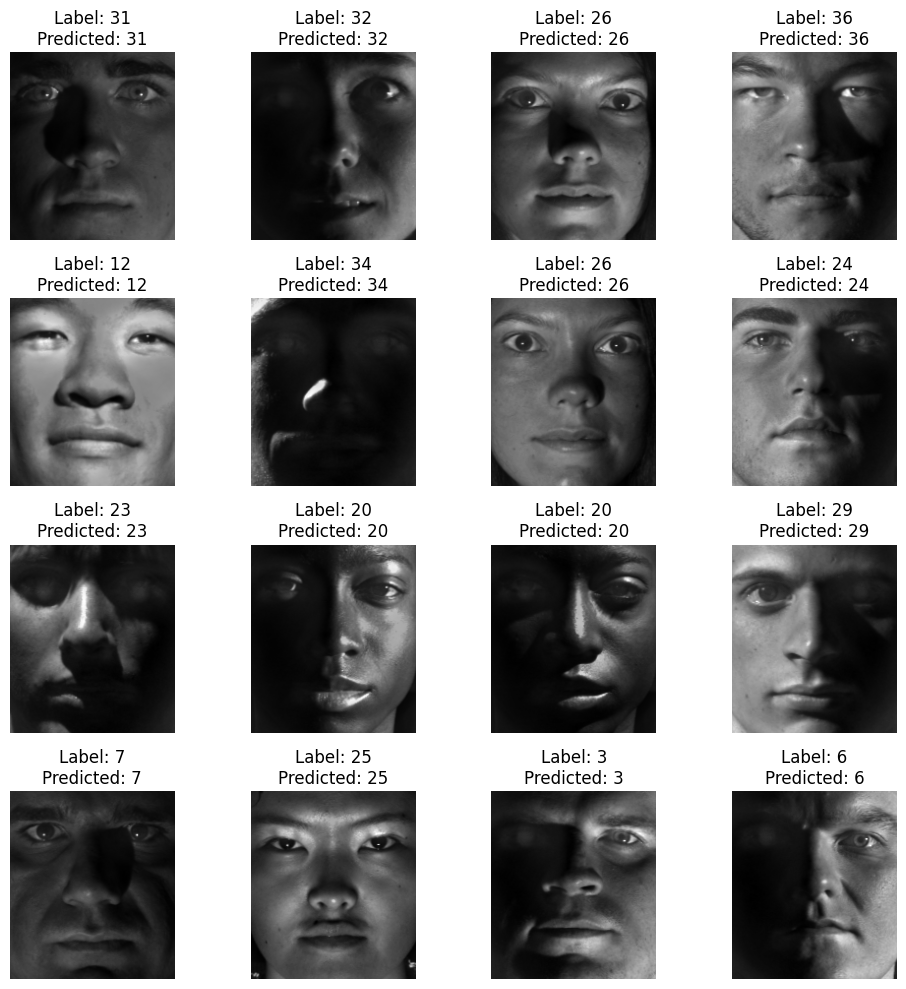

Batch Accuracy: 100.00%


In [11]:
import matplotlib.pyplot as plt

images, labels = next(iter(test_loader))
images = images.to(device)
labels = labels.to(device)

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(len(images)):
    if i >= len(axes):
        break
    
    image = images[i].cpu().numpy().squeeze()
    label = labels[i].cpu().numpy()
    pred = predicted[i].cpu().numpy()

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}\nPredicted: {pred}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

correct = (predicted == labels).sum().item()
accuracy = correct / len(images) * 100
print(f"Batch Accuracy: {accuracy:.2f}%")


##### Incorrect Predictions
Display images with incorrect predictions.

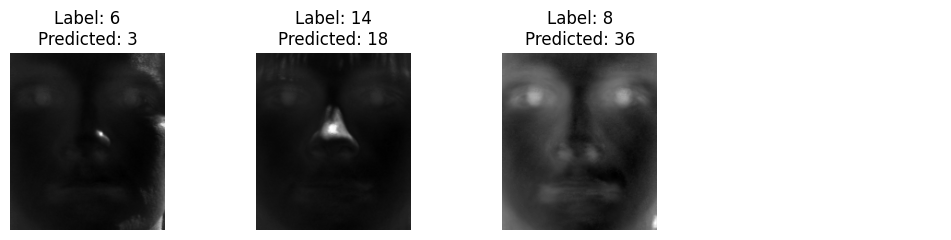

In [14]:
misclassified_images = []
misclassified_labels = []
misclassified_predictions = []

for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    misclassified_mask = predicted != labels
    misclassified_images.extend(images[misclassified_mask].cpu())
    misclassified_labels.extend(labels[misclassified_mask].cpu())
    misclassified_predictions.extend(predicted[misclassified_mask].cpu())

num_misclassified = len(misclassified_images)
num_rows = (num_misclassified + 3) // 4

fig, axes = plt.subplots(num_rows, 4, figsize=(10, 2.5 * num_rows))

for i, (image, label, pred) in enumerate(zip(misclassified_images, misclassified_labels, misclassified_predictions)):
    if num_rows > 1:
        row_idx = i // 4
        col_idx = i % 4
        ax = axes[row_idx, col_idx]
    else:
        ax = axes[i % 4]  

    ax.imshow(image.numpy().squeeze(), cmap='gray')
    ax.set_title(f"Label: {label}\nPredicted: {pred}")
    ax.axis('off')

for i in range(num_misclassified, num_rows * 4):
    if num_rows > 1:
        row_idx = i // 4
        col_idx = i % 4
        axes[row_idx, col_idx].axis('off')
    else:
        axes[i % 4].axis('off')

plt.tight_layout()
plt.show()


The images with incorrect predictions are difficult to discern even for the human eye.

### Save Model
Save the model for future predictions.

In [15]:
torch.save(model.state_dict(), 'CNN.pth')


### Load Model
Load the model and randomly input a test image, then display the prediction result.

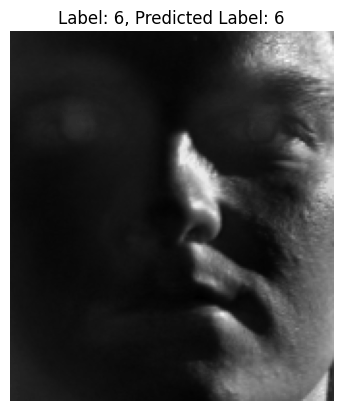

In [16]:
new_model = CNN()  
new_model.load_state_dict(torch.load('CNN.pth'))
new_model.eval()

images, labels = next(iter(test_loader))
index = np.random.randint(len(images))
image = images[index]
label = labels[index]

with torch.no_grad():
    output = new_model(image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

image_np = image.squeeze().numpy()
plt.imshow(image_np, cmap='gray')
plt.title(f"Label: {label.item()}, Predicted Label: {predicted_label.item()}")
plt.axis('off')
plt.show()
